# Exploratory analysis of energy generation data from SMARD.de 
#### Thoughts and ideas:
- I'm first looking at daily data, but I could also get the original temporal intra-day resolution

In [1]:
import sys
from pathlib import Path

import pandas as pd

In [2]:
# Get cwd path
cwd_path = Path.cwd()
cwd_path.parent

PosixPath('/Users/brand/my_code/meteoviz/course_project')

In [4]:
df = pd.read_csv(cwd_path.parent / 'data/Realisierte_Erzeugung_202108010000_202308012359_Tag.csv', sep=';')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Datum                                                 731 non-null    object
 1   Anfang                                                731 non-null    object
 2   Ende                                                  731 non-null    object
 3   Biomasse [MWh] Berechnete Auflösungen                 731 non-null    object
 4   Wasserkraft [MWh] Berechnete Auflösungen              731 non-null    object
 5   Wind Offshore [MWh] Berechnete Auflösungen            731 non-null    object
 6   Wind Onshore [MWh] Berechnete Auflösungen             731 non-null    object
 7   Photovoltaik [MWh] Berechnete Auflösungen             731 non-null    object
 8   Sonstige Erneuerbare [MWh] Berechnete Auflösungen     731 non-null    

In [6]:
df.head(3)

,Datum,Anfang,Ende,Biomasse [MWh] Berechnete Auflösungen,Wasserkraft [MWh] Berechnete Auflösungen,Wind Offshore [MWh] Berechnete Auflösungen,Wind Onshore [MWh] Berechnete Auflösungen,Photovoltaik [MWh] Berechnete Auflösungen,Sonstige Erneuerbare [MWh] Berechnete Auflösungen,Kernenergie [MWh] Berechnete Auflösungen,Braunkohle [MWh] Berechnete Auflösungen,Steinkohle [MWh] Berechnete Auflösungen,Erdgas [MWh] Berechnete Auflösungen,Pumpspeicher [MWh] Berechnete Auflösungen,Sonstige Konventionelle [MWh] Berechnete Auflösungen
0,01.08.2021,00:00,00:00,103.358,"54.685,75","56.695,75","145.762,25",151.677,3.208,"186.211,25",166.061,"27.797,75","52.496,75","10.843,25","34.559,25"
1,02.08.2021,00:00,00:00,101.689,"55.900,5","65.273,75","195.329,75","193.657,25",3.180,"188.552,75","242.623,75","60.529,75","63.037,5","24.349,25","34.240,5"
2,03.08.2021,00:00,00:00,102.242,"56.261,25",6.676,"46.127,25",176.434,"3.140,75","190.559,25","277.800,25","139.353,5","91.756,25","21.981,75",35.124


In [10]:
df['Datum'] = pd.to_datetime(df['Datum'], format='%d.%m.%Y')

In [12]:
df['Datum'].max()

Timestamp('2023-08-01 00:00:00')

In [13]:
df['Datum'].min()

Timestamp('2021-08-01 00:00:00')

In [15]:
df.set_index('Datum', inplace=True)

In [24]:
onshore_wind = df['Wind Onshore [MWh] Berechnete Auflösungen']
onshore_wind

Datum
2021-08-01    145.762,25
2021-08-02    195.329,75
2021-08-03     46.127,25
2021-08-04     36.451,25
2021-08-05        71.280
                 ...    
2023-07-28       235.468
2023-07-29       203.028
2023-07-30     324.696,5
2023-07-31       494.799
2023-08-01       476.897
Name: Wind Onshore [MWh] Berechnete Auflösungen, Length: 731, dtype: object

#### Convert (German) thousands and decimal seperators in values to (US/UK) decimal full stop format
- Values have units of megawatt hours (MWh)

In [37]:
translation_table = str.maketrans({'.': None, ',': '.'})
onshore_wind = onshore_wind.str.translate(translation_table).astype(float)

In [42]:
onshore_wind.describe()

count       731.000000
mean     279804.851915
std      208243.368089
min       21427.250000
25%      119775.125000
50%      213278.000000
75%      387514.125000
max      962851.500000
Name: Wind Onshore [MWh] Berechnete Auflösungen, dtype: float64

<Axes: xlabel='Datum'>

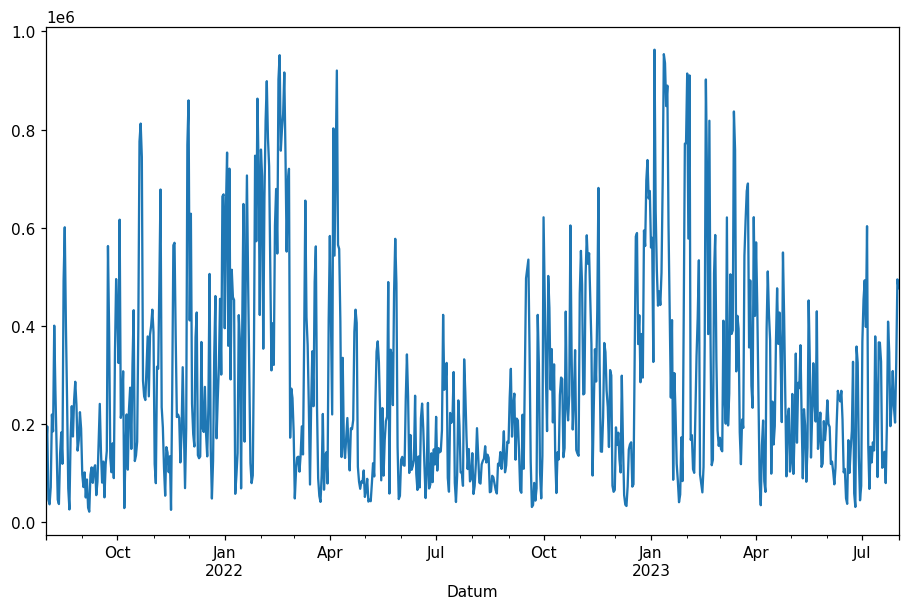

In [40]:
onshore_wind.plot(figsize=(10,6))